# **Simulación de cola $M/M/k/k/∞$ (Erlang B)** 
#### By: Cristian Alape, Alvaro Zarabanda, Youssef Ortiz

## *Primera actividad*

Construyan el modelo matemático de la cola asignada a su grupo. El modelo debe incluir:
diagrama de transición de estados, ecuaciones de estado estacionario y el procedimiento matemático que permita calcular la medida de desempeño de interés (propabilidad de bloqueo:
$Pk$, en los sistemas $M/M/1/k/∞$ y $M/M/k/k/∞$; y tiempo medio de espera: $E[Tw]$, en el
sistema $M/M/k/∞/∞$).

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/Erlang_B.png)
  <p><strong>Figura 1:</strong> Diagrama de la cola Erlang B.</p>
</div>

Para el analisis de esta cola, primero se plantea y se tiene en cuenta el diagrama de transicion de estados para el modelado matematico:

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/Estados.png)
  
  <p><strong>Figura 2:</strong> Diagrama de transición de estados.</p>
</div>

De esta forma podemos obtener la eciaciones de destado estacionario:

<div style="text-align: center;">

  | Estado | Tasa promedio de salida del estado | Tasa promedio de llegada al estado | Probabilidad del estado |
  |--------|-----------------------------------|-----------------------------------|-----------------------------------|
  | 0      | $\lambda P_0$                    | $\mu P_1$                        | $$ P_1 = \frac{\lambda}{\mu}P_0 $$  |
  | 1      | $\lambda P_1 + \mu P_1$           | $\lambda P_0 + 2\mu P_2$        | $$ P_2 = \frac{\lambda}{2\mu}P_1 $$  |
  | 2      | $\lambda P_2 + 2\mu P_2$           |  $\lambda P_1 + 3\mu P_3$                       | $$ P_3 = \frac{\lambda}{3\mu}P_2 $$                        |
  | 3      | $\lambda P_3 + 3\mu P_3$           | $\lambda P_2 + 4\mu P_4$                       | $$ P_4 = \frac{\lambda}{4\mu}P_3 $$                        |

</div>

  <p><strong>Tabla 1:</strong> Ecuaciones de estado estacionario.</p>

**Fórmula general de probabilidad de estado:**

$$
P_n = \frac{\lambda}{n\mu} P_{n-1}
$$


Luego, hallando $P_n$ en funcion de $P_0$ obtenemos:

$$
P_n = \left(\frac{\lambda}{\mu}\right)^n \frac{1}{n!} P_0
$$

Sabiendo que la suma de las probabilidades es 1, entonces $P_0 + P_1 + P_2+ ... + P_n = 1$ asi:

$$ \sum_{n=0}^{k} P_n  = 1$$

Luego reemplazando $P_n$

$$ \sum_{n=0}^{k} \left(\left(\frac{\lambda}{\mu}\right)^n \frac{1}{n!}  P_0\right) = 1$$

Despejando $P_0$

$$P_0 = \frac{1}{\sum_{n=0}^{k} \left(\frac{\lambda}{\mu}\right)^n \frac{1}{n!}}$$

Finalmente se obtiene $P_n$ en funcion de $\lambda$ y $\mu$

$$
P_n = \frac{\left(\frac{\lambda}{\mu}\right)^n \frac{1}{n!}}{\sum_{n=0}^{k} \left(\frac{\lambda}{\mu}\right)^n \frac{1}{n!}}
$$

Luego, se halla la probabilidad de bloqueo reemplazando $n$ por $k$

$$
P_k = \frac{\left(\frac{\lambda}{\mu}\right)^k \frac{1}{k!}}{\sum_{n=0}^{k} \left(\frac{\lambda}{\mu}\right)^n \frac{1}{n!}}
$$

Luego $$A= \frac{\lambda}{\mu}$$

Y reemplazando A:

$$
P_k = \frac{\left(A\right)^k \frac{1}{k!}}{\sum_{n=0}^{k} \left(A\right)^n \frac{1}{n!}}
$$

Se obtiene la formula de probabilidad de blouqeo. Ahora bien, cuando se presenta un número muy grande de servidores, surgen problemas computacionales debido al cálculo de factoriales grandes. Estos crecen exponencialmente y requieren una enorme cantidad de memoria y tiempo de ejecución, lo que puede causar desbordamientos o errores de precisión. Además, el cálculo de factoriales grandes es costoso y poco práctico a nivel computacional. Una solución común es utilizar una funcion recursiva, la cual se expresa de la siguiente manera:

$$
P_k = \frac{A * P_{k-1}}{A * P_{k-1} + k}
$$

## *Segunda actividad*

Diseñen y codifiquen en MATLAB una función que permita simular la cola asignada. Los
parámetros de entrada de la función deben ser: un vector con los tiempos entre arribos
consecutivos y un vector con los tiempos de servicio. El resultado de la simulación debe ser
la estimación de la medida de desempeño.

Para el desarrollo, se optó por implementar la simulacion en Python utilizando la libreria Simpy $(Insertar Referencia)$. Al realizar la prueba se pasaron los siguientes parametros de entrada:

$k = 1$

$tea = [1,2,3,7,2,3,8,0,5]$

$tes = [9,1,4,1,1,5,3,8,2]$

donde $k$ es el número de servidores, $tea$ el vector de tiempos entre arribos y $tes$ los tiempos de servicio. Asi se obtienen los siguientes resuldados:

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/Resultados_Erlang_B.png)
  
  <p><strong>Figura 3:</strong> Clientes Atendidos vs Bloqueados.</p>
</div>

### Diagrama de flujo del sistema de colas 

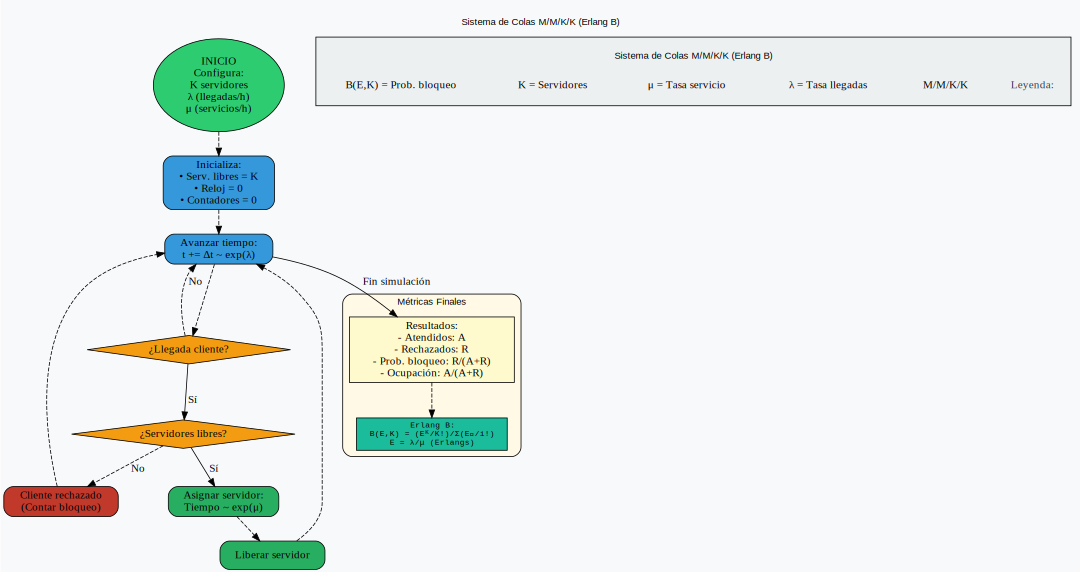

In [20]:
generate_mmkk_diagram()

## *Tercera actividad*

Realicen la simulación de la cola asignada, variando $A = λ/µ$. Consideren que los elementos del vector de tiempos entre arribos consecutivos se distribuyen exponencialmente, con
parámetro $λ$; y que los elementos del vector de tiempos de servicio se distribuyen exponencialmente, con parámetro $µ$. Como resultado principal, realicen la gráfica de la medida
de desempeño versus A. Verifiquen que los resultados de simulación coincidan con el valor
teórico de la medida de desempeño.

Para validar el comportamiento del modelo de Erlang B, se implementó una simulación de eventos discretos en Python utilizando la bilbioteca simpy. Se comparó la probabilidad teórica de bloqueo $P_k$ con los resultados obtenidos empíricamente.

### Función teórica

Se utilizó la fórmula recursiva de Erlang-B para calcular la probabilidad de bloqueo y asi generar el correspondiente algoritmo para el cálculo de la probabilidad de bloqueo teórica del sistema:

$$
P_k = \frac{A * P_{k-1}}{A * P_{k-1} + k}
$$

Donde $A=\frac{\lambda}{\mu}$ es la carga ofrecida al sistema

```python
def bloqueo_erlang_b(K, l, m): 
    A= l / m
    B = 1.0
    for k in range(1, K + 1):
        B = (A * B) / (k + A * B)
    return B
```


### Simulación

Se generaron tiempos de llegada y servicio según distribuciones exponenciales con tasas 
λ y μ. Se modeló un recurso con capacidad limitada y se contabilizaron los clientes bloqueados.

Se realizó la evaluación comparativa para un sistema con $k = 10$ servidores, tasa de llegada $\lambda = 8$ y distintos valores de la tasa de servicio $\mu$, modificando asi la carga ofrecida $A=\lambda / \mu$

La fracción de clientes bloqueados se calculó como:

$$
    \hat{P_k} = \frac{clientes bloqueados}{total clientes}
$$

### $A \leq k$

Al analizar el comportamiento del sistema para $A \leq k$ se observa una probabilidad de bloqueo baja para cargas pequeñas y un crecimiento exponencial a medida que $A$ se aproxima a $k$. Las simulaciones, representadas por puntos rojos, muestran buena concordancia con la curva teórica azul, validando el modelo mediante eventos generados con simpy.

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosAct3.png)
  
  <p><strong>Figura 4:</strong> Simulación A≤k.</p>
</div>

### $A \geq k$

En la segunda parte, con $A≥k$, se observa que la probabilidad de bloqueo se incrementa rápidamente hasta saturar el sistema, alcanzando valores cercanos a 1. Nuevamente, las simulaciones siguen adecuadamente la predicción teórica.

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosAct3-2.png)
  
  <p><strong>Figura 5:</strong> Simulación A≥k.</p>
</div>

Los resultados muestran que la simulación sigue de cerca la curva teórica en ambos rangos: cuando $A \leq k$, y cuando $A \geq k$, lo cual valida la aproximación teórica del modelo Erlang B en entornos sin cola.



## *Cuarta actividad*

Utilicen la función superfuncion (que hará parte de una tarea futura), para generar cuatro funciones asociadas al conjunto de datos suministrados en clase. Muestren evidencias de la validez de sus funciones (comparación de las gráficas de las distribuciones de los datos y gráficas qqplot, por ejemplo).

Como primer paso, se optó por homologar la funcion "superfunción" a Python, con el fin de generar cada una de las 4 funciones asociadas a cada archivo 

```python
# BCpAug89
datosAug = np.loadtxt("./../BCpAug89.TL")
muestraAgosto = np.diff(datosAug[:, 0])

# BCpOct89
datosOct = np.loadtxt("./../BCpOct89.TL")
muestraOctubre = np.diff(datosOct[:, 0])

# BCOct89Ext
datosOctExt = np.loadtxt("./../BCOct89Ext.TL")
muestraOctubreExt = np.diff(datosOctExt[:, 0])

# BCOct89Ext4
datosOctExt4 = np.loadtxt("./../BCOct89Ext4.TL")
muestraOctubreExt4 = np.diff(datosOctExt4[:, 0])

superfuncion(muestraAgosto, "agostoAleatorio")
superfuncion(muestraOctubre, "octubreAleatorio")
superfuncion(muestraOctubreExt, "octubreExtAleatorio")
superfuncion(muestraOctubreExt4, "octubreExt4Aleatorio")
```

Realizando la grafica de la cdf y pdf correspondientes a cada muestra se obtuvo lo siguiete: 

### Muestra Agosto

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/Agostopdfcdf.png)
  
  <p><strong>Figura 6:</strong> pdf y cdf Agosto.</p>
</div>

### Muestra Octubre

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/Octubrepdfcdf.png)
  
   <p><strong>Figura 7:</strong> pdf y cdf Octubre.</p>
</div>

### Muestra OctubreExt

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/OctubreExtpdfcdf.png)
    <p><strong>Figura 8:</strong> pdf y cdf OctubreExt.</p>
</div>

### Muestra OctubreExt4

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/OctubreExt4pdfcdf.png)
  <p><strong>Figura 9:</strong> pdf y cdf OctubreExt4.</p>
</div>

Luego, se validan las distribuciones generadas por las funciones y las muestras originales con una QQplot:

### QQPlot Agosto

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/QQplotAgosto.png)
  
   <p><strong>Figura 10:</strong> QQplot Agosto.</p>
</div>

### QQPlot Octubre

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/QQplotOctubre.png)
  
  <p><strong>Figura 11:</strong> QQplot Octubre.</p>
</div>

### QQPlot OctubreExt

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/QQplotOctubreExt.png)
  
  <p><strong>Figura 12:</strong> QQplot OctubreExt.</p>
</div>

### QQPlot OctubreExt4

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/QQplotOctubreExt4.png)
      <p><strong>Figura 13:</strong> QQplot OctubreExt4.</p>

</div>


## *Quinta actividad*

Realicen la simulación de la cola asignada variando A = λ/µ. Consideren que los elementos del vector de tiempos entre arribos consecutivos, se obtienen con cada una de las cuatro funciones de la cuarta actividad (para cada función consideren que el parámetro λ, se estima con el inverso multiplicativo de la media aritmética de los elementos del vector generado con cada una de las cuatro funciones: λ ≈ 1/$T_{arribo}$), y que los elementos del vector de tiempos de servicio se distribuyen exponencialmente, con parámetro µ. Como resultado principal, realicen las cuatro gráficas de la medida de desempeño versus A. Comparen los resultados de simulación con el valor teórico (para distribuciones exponenciales) de la medida de desempeño.

### 1. Se utilizaron cuatro conjuntos de datos provenientes de las funciones de la cuarta actividad:

```python
import numpy as np
if m == 1:
    return np.transpose(np.random.choice(numero, (n,)))
else:
    return np.random.choice(numero, (m, n))

```

### Comparación entre la simulación y el modelo de Erlang-B

Con el objetivo de validar la coherencia de la simulación del sistema M/M/K/K frente a su expresión teórica (modelo de Erlang-B), se realizaron dos experimentos, diferenciando los casos en los que el parámetro de tráfico $A = \frac{\lambda}{\mu}$ es **menor o igual que $k$** y cuando es **mayor que $k$**.

Se generaron 100 valores equiespaciados de $A$ en cada intervalo y, para cada valor, se ajustó $\mu$ manteniendo constante $\lambda$, la cual fue estimada como el inverso de la media de los tiempos entre arribos generados a partir de los datos reales.

En cada simulación:
- Se generaron 1 millón de arribos usando la función aleatoria.
- Los tiempos de servicio se generaron a partir de una distribución exponencial con media $1/\mu$.
- Se registraron las tasas de bloqueo, es decir, la proporción de clientes que llegaron y encontraron todos los servidores ocupados.

Los resultados se compararon contra la probabilidad teórica de bloqueo calculada mediante la fórmula de Erlang-B. Se graficaron ambas curvas (teórica y simulada) para observar el grado de coincidencia.

### Agosto Aleatorio

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosAgosto1.png)
  
  <p><strong>Figura 14:</strong> Agosto Aleatorio teórico y simulacion A≤k .</p>
</div>

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosAgosto2.png)
  
   <p><strong>Figura 15:</strong> Agosto Aleatorio teórico y simulacion A≥k .</p>
</div>


### Octubre Aleatorio

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosOctubre1.png)
  
  <p><strong>Figura 16:</strong> Octubre Aleatorio teórico y simulacion A≤k .</p>
</div>

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosOctubre2.png)
  
  <p><strong>Figura 17:</strong> Octubre Aleatorio teórico y simulacion A≥k .</p>
</div>

### OctubreExt Aleatorio

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosOctubreExt1.png)
  
  <p><strong>Figura 18:</strong> OctubreExt Aleatorio teórico y simulacion A≤k .</p>
</div>

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosOctubreExt2.png)
  
  <p><strong>Figura 19:</strong> OctubreExt Aleatorio teórico y simulacion A≥k .</p>
</div>

### OctubreExt4 Aleatorio

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosOctubreExt4-1.png)
  
  <p><strong>Figura 20:</strong> OctubreExt4 Aleatorio teórico y simulacion A≤k .</p>
</div>

<div style="text-align: center;">

  ![Figura 1: Diagrama de la cola Erlang B](../assets/resultadosOctubreExt4-2.png)
  
  <p><strong>Figura 21:</strong> OctubreExt4 Aleatorio teórico y simulacion A≥k .</p>
</div>


## *Sexta actividad*

Los modelos Erlang se han utilizado en el ámbito de las telecomunicaciones y la investigación operativa durante casi un siglo. AK Erlang , ingeniero telefónico danés, desarrolló estos modelos para planificar la capacidad de la red telefónica y predecir la calidad del servicio garantizado, basándose en métricas básicas sobre el volumen y la duración de las llamadas.

Los modelos Erlang se utilizan ampliamente en telecomunicaciones, incluyendo el dimensionamiento de redes GPRS, el dimensionamiento de líneas troncales, los modelos de dotación de personal de centros de llamadas y otros ámbitos de planificación de capacidad donde la llegada de solicitudes es aparentemente aleatoria.

La aplicabilidad de la cola tipo Erlang B se ve mayormente en el campo de las telecomunicaciones debido a la naturaleza para la cual fue creado este método, sin embargo, existen múltiples aplicaciones en el campo de ingeniería y la informática. La clave de su versatilidad radica en la abstracción del concepto de "servidor", que puede representar una variedad de recursos limitados en los sistemas informáticos. 

Resulta bastante obvio que los modelos Erlang también son ampliamente aplicables al análisis del rendimiento informático. Existe una amplia literatura sobre este tema que se remonta a los inicios del mainframe. Los modelos Erlang son la base de la mayoría de los grupos de gestión de capacidad[1].

El modelo Erlang B puede utilizarse para estimar la capacidad de manejo de solicitudes concurrentes de un servidor web. En este contexto, los "servidores" del modelo Erlang B son los hilos (threads) de trabajo o procesos del servidor web disponibles para atender las solicitudes HTTP entrantes. Si todas estas unidades de procesamiento están ocupadas y no existe una cola de espera (o esta es muy limitada y se llena rápidamente), las nuevas solicitudes pueden ser rechazadas, generando errores como "503 Service Unavailable".

Si el pool de hilos está configurado para rechazar nuevas tareas cuando todos los hilos están ocupados (en lugar de encolarlas indefinidamente), el modelo Erlang B puede calcular la probabilidad de este rechazo.

Por ejemplo, consideremos un servicio web que procesa tareas. Si se conoce la tasa de llegada de tareas y el tiempo promedio que un hilo tarda en procesar una tarea, se puede calcular el tráfico ofrecido en Erlangs. Luego, utilizando la fórmula Erlang B, se puede determinar la probabilidad de que una tarea sea rechazada para un tamaño de pool de hilos dado, o, inversamente, calcular el tamaño del pool de hilos necesario para alcanzar una probabilidad de rechazo objetivo. Esto es crucial para el ajuste del rendimiento en software multihilo, asegurando que el sistema pueda manejar la carga esperada sin una tasa de rechazo excesiva.

La siguiente tabla ilustra un ejemplo de aplicación de Erlang B para el dimensionamiento de un pool de hilos para conexiones a un servidor web: 

| Parámetro        | Descripción           | Procesamiento de Tareas de Servicio Web  | Observaciones |
| ------------- |:-------------|:-----:| :-------------|
| Tasa de Llegada (λ) | Número medio de tareas que llegan por unidad de tiempo. | 100 tareas/segundo | Debe medirse o estimarse para la "hora pico". |
| Tiempo Medio de Servicio (h o 1/μ) | Tiempo medio que un hilo tarda en procesar una tarea.      |   0.05 segundos/tarea (50 ms)| Asegurar que esto refleje el tiempo real de procesamiento, no incluyendo el tiempo potencial de espera en cola (si existiera una cola antes del rechazo). |
| Tráfico Ofrecido (A o E=λ×h) | Carga de trabajo total ofrecida al sistema en Erlangs. | 100 tareas/s × 0.05 s/tarea = 5 Erlangs | Este es el tráfico que el pool procesaría si tuviera un número infinito de hilos. |
| Número de Hilos (c o m) | Número de hilos de trabajo concurrentes en el pool. | A determinar (p. ej., probar c=7) | Esta es la variable que a menudo se quiere resolver, o se prueban diferentes valores. |
| Probabilidad de Bloqueo Objetivo ($P_B$ o GoS) | Porcentaje máximo deseado de tareas a ser rechazadas. | 0.01 (1% de bloqueo) | Requisito de negocio/rendimiento. Un $P_B$ más bajo requiere más hilos para el mismo tráfico.|
| $P_B$ Calculada (usando fórmula Erlang B) | Probabilidad resultante de rechazo de tareas. | Para A=5 Erlangs, c=7 hilos, $P_B$ ≈0.077 (7.7%) (Valor de una calculadora Erlang B) | Si 7.7% es demasiado alto, aumentar 'c'. Para A=5, $P_B$ =0.01, 'c' necesitaría ser alrededor de 10-11 hilos. (Calculado usando una calculadora Erlang B estándar con A=5, $P_B$=0.01 resulta en c=10). |

  <p><strong>Tabla 2:</strong> Ejemplo de aplicación.</p>

## *Conclusiones*

La teoría de colas busca analizar y optimizar los sistemas de servicio para mejorar la eficiencia y la rentabilidad. El objetivo fundamental es comprender la dinámica de la formación de colas para poder diseñar sistemas que minimicen los tiempos de espera, optimicen la utilización de recursos y, en última instancia, mejoren la experiencia del usuario o cliente. La capacidad de analizar matemáticamente las líneas de espera permite estudiar factores como el tiempo medio de espera o la capacidad máxima de un sistema antes de que colapse[2].

Además, Erlang B no solo sirve para calcular el número de recursos, sino que también facilita implícitamente un análisis de costo-beneficio. Cada servidor adicional (hilo, licencia, conexión) reduce la probabilidad de bloqueo pero incurre en un costo. Erlang B ayuda a encontrar un punto de equilibrio basado en un Grado de Servicio aceptable, cuantificando el compromiso entre el costo de los recursos y el costo de un servicio deficiente o solicitudes perdidas. La flexibilidad del modelo Erlang B, donde los "servidores" pueden ser una abstracción de recursos físicos, lógicos o conceptuales, es una de las razones de su amplia aplicabilidad en la informática. 

Pudimos apreciar en la actividad 5 que aunque ambas curvas muestran una tendencia creciente coherente con el modelo Erlang-B, la simulación presenta una sobreestimación de la probabilidad de bloqueo, particularmente cuando $A$ se aproxima al número de servidores $k$. Esta diferencia puede atribuirse a factores como el tiempo de simulación, la forma en que se estiman los parámetros a partir de datos reales, o posibles sesgos en la generación de tiempos de servicio. Sin embargo, la tendencia general valida cualitativamente el comportamiento esperado del sistema M/M/K/K para las dos priemras funciones. Por otra parte, para las dos últimas funciones, en el caso de cargas menores o iguales al número de servidores ($A \leq k$), se observa una mayor discrepancia entre la curva teórica y la simulada, especialmente cuando la relación $\lambda / \mu$ se acerca al valor de $k$. Esta desviación depende del generador de tiempos entre arribos utilizado, lo que sugiere que el modelo es más sensible a la variabilidad empírica en esta región. Luego, en escenarios de alta carga ($A \geq k$), la probabilidad de bloqueo obtenida por simulación se aproxima con mayor fidelidad a la curva teórica. Las diferencias son menores y tienden a desaparecer conforme aumenta la carga del sistema, lo cual es consistente con el comportamiento asintótico esperado del modelo de Erlang-B. Esto permite concluir que, mientras la simulación puede diferir notablemente del valor teórico bajo cargas moderadas o bajas (dependiendo de la función aleatoria usada), en condiciones de alta carga la estabilidad del modelo mejora y la simulación se alinea mejor con la teoría.

A pesar de su utilidad, el modelo Erlang B tiene varias limitaciones que deben considerarse, especialmente en el contexto de los sistemas informáticos modernos, que a menudo presentan características de tráfico y comportamiento más complejas que las asumidas por el modelo.

El tráfico real en sistemas de TI puede ser "rafagoso" (bursty) o autocorrelacionado, desviándose del proceso de llegada de Poisson. De manera similar, los tiempos de servicio para tareas computacionales pueden no seguir una distribución exponencial[3] .

Mecanismos de Reintento: El modelo Erlang B asume que las solicitudes bloqueadas se eliminan y no reintentan el acceso al servicio. Sin embargo, en muchos sistemas de TI (como navegadores web, aplicaciones cliente o incluso componentes internos del sistema), los reintentos automáticos son una práctica común. 

Más allá de ser una simple fórmula de cálculo, el estudio y la aplicación de Erlang B inculcan una comprensión fundamental de los conceptos clave de la teoría del tráfico y el rendimiento de sistemas: la carga, la capacidad, el bloqueo y el Grado de Servicio. Estos conceptos son esenciales para cualquier ingeniero que se ocupe del rendimiento de los sistemas, independientemente de las herramientas específicas que utilice finalmente. 

Finalmente como trabajo futuro se puede mejorar mejorar significativamente la eficiencia computacional manteniendo la precisión en comparación con el cálculo directo de la fórmula de Erlang B y sus inversas empleando redes neuronales artificiales. 

El cálculo directo de la fórmula de Erlang B puede volverse computacionalmente intensivo, especialmente con un gran número de canales y/o una alta intensidad de tráfico, pudiendo incluso exceder las capacidades computacionales incluso de un servidor a escala productiva.  Además, no existen funciones inversas de forma cerrada para la fórmula de Erlang B, lo que dificulta determinar directamente la intensidad de tráfico o el número de canales necesarios para un GOS específico[4].

La optimización radica en resolver el problema inverso el cual consiste en calcular el número requerido de canales o la cantidad máxima de tráfico para una probabilidad de bloqueo de llamadas dada.

Para la predicción de la probabilidad de bloqueo se plantea (log p) que toma como entrada el numero de canales y la intensidad de trafico (a), la predicción de esta variable toma como entrada el número de canales (S) y la probabilidad de bloqueo (log P). La predicción del número de canales (S): Toma como entrada la intensidad del tráfico (a) y la probabilidad de bloqueo (log P).

Se observó que usar la representación logarítmica de la probabilidad de bloqueo (log P) mejora los resultados.  Las RNA se entrenaron con datos obtenidos de la aplicación directa de la fórmula de Erlang B.

Los modelos son válidos dentro de los rangos de las variables de entrada utilizadas para el entrenamiento (hasta 250 canales y una probabilidad de bloqueo de hasta el 50%).  Una ventaja significativa es que el modelo neuronal puede proporcionar cálculos en regiones donde la aplicación directa de la fórmula de Erlang B podría fallar debido a limitaciones numéricas.


## *Anexos*

### Codigo de las actividades

[Actividades Erlang B](https://github.com/criss201x/ERLANG_B/blob/main/notebooks/erlanb_b_base.ipynb)

### Diagramas de flujo

In [18]:
def generate_mmkk_diagram():
    from graphviz import Digraph
    dot = Digraph('SistemaMMKK', filename='mmkk_system.gv', engine='dot')
    dot.attr(rankdir='TB', size='15,16', bgcolor='#f8f9fa', fontname='Arial',
            label='\nSistema de Colas M/M/K/K (Erlang B)\n', labelloc='t', fontsize='12')

    # ===== PALETA COMPACTA =====
    colors = {
        'inicio': '#2ecc71',
        'fin': '#e74c3c',
        'proceso': '#3498db',
        'decision': '#f39c12',
        'servidor': '#27ae60',
        'rechazo': '#c0392b',
        'formula': '#1abc9c'
    }

    # ===== NODOS PRINCIPALES =====
    nodes = [
        ('Start', 'INICIO\nConfigura:\nK servidores\nλ (llegadas/h)\nμ (servicios/h)', 'ellipse', colors['inicio']),
        ('Init', 'Inicializa:\n• Serv. libres = K\n• Reloj = 0\n• Contadores = 0', 'box', colors['proceso']),
        ('Time', 'Avanzar tiempo:\nt += Δt ~ exp(λ)', 'box', colors['proceso']),
        ('Arrival', '¿Llegada cliente?', 'diamond', colors['decision']),
        ('Check', '¿Servidores libres?', 'diamond', colors['decision']),
        ('Assign', 'Asignar servidor:\nTiempo ~ exp(μ)', 'box', colors['servidor']),
        ('Release', 'Liberar servidor', 'box', colors['servidor']),
        ('Reject', 'Cliente rechazado\n(Contar bloqueo)', 'box', colors['rechazo'])
    ]

    for id, label, shape, color in nodes:
        dot.node(id, label, shape=shape, style='filled,rounded' if shape == 'box' else 'filled', fillcolor=color)

    # ===== BLOQUE DE MÉTRICAS =====
    with dot.subgraph(name='cluster_metrics') as met:
        met.attr(label='Métricas Finales', style='rounded,filled', fillcolor='#fff9e6')
        met.node('Results', '''Resultados:
    - Atendidos: A
    - Rechazados: R
    - Prob. bloqueo: R/(A+R)
    - Ocupación: A/(A+R)''', shape='box', style='filled', fillcolor='#fffacd')
        met.node('ErlangB', '''Erlang B:
    B(E,K) = (Eᴷ/K!)/Σ(Eⁱ/i!)
    E = λ/μ (Erlangs)''', shape='box', style='filled', fillcolor=colors['formula'], fontname='Courier', fontsize='10')

    # ===== LEYENDA VERTICAL =====
    with dot.subgraph(name='cluster_legend') as leg:
        leg.attr(style='filled', fillcolor='#ecf0f1')
        legend_items = [
            'Leyenda:',
            '◼ M/M/K/K',
            '◼ λ = Tasa llegadas',
            '◼ μ = Tasa servicio',
            '◼ K = Servidores',
            '◼ B(E,K) = Prob. bloqueo'
        ]
        for i, item in enumerate(legend_items):
            leg.node(f'L{i}', item, shape='plaintext', fontcolor='#2c3e50' if i==0 else 'black')

    # ===== CONEXIONES CORREGIDAS =====
    connections = [
        ('Start', 'Init', None),
        ('Init', 'Time', None),
        ('Time', 'Arrival', None),
        ('Arrival', 'Check', 'Sí'),
        ('Arrival', 'Time', 'No'),
        ('Check', 'Assign', 'Sí'),
        ('Check', 'Reject', 'No'),
        ('Assign', 'Release', None),
        ('Release', 'Time', None),
        ('Reject', 'Time', None),
        ('Time', 'Results', 'Fin simulación'),
        ('Results', 'ErlangB', None)
    ]

    for src, dst, label in connections:
        dot.edge(src, dst, label=label, style='dashed' if label in ['No', None] else 'solid')

    # ===== AJUSTES FINALES =====
    dot.attr(ranksep='0.4', nodesep='0.3')
    dot
    return dot

## *Referencias*

1. Thread pools and Erlang models - wide awake developers. (2008, December 1). https://www.michaelnygard.com/blog/2008/11/thread-pools-and-erlang-models/
2. Ludeña, J. A. (2022, November 24). Teoría de colas Qué es, definición y concepto. Economipedia. https://economipedia.com/definiciones/teoria-de-colas.html
3. Elshawesh, A. M., & Abdulali, M. (2014). Dimensioning of Circuit Switched networks by using Simulation code based on Erlang (B) formula. Department of Telecommunications and Networks Faculty of Information Technology Misurata University/Misurata, 1–5. https://doi.org/10.1109/gscit.2014.6970093
4. Marinković, Z., & Stošić, B. P. (2023). Applications of artificial neural networks for calculation of the Erlang B formula and its inverses. Engineering Reports, 5(9). https://doi.org/10.1002/eng2.12647